In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 92% 0.98G/1.06G [00:06<00:02, 41.2MB/s]
100% 1.06G/1.06G [00:06<00:00, 166MB/s] 


In [ ]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all the contents to /content
zip_ref.extractall('/content')

# Close the zip file
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#GENARATORS
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int", #CAT=0 ,DOG=1
    class_names=None,
    color_mode="rgb",
    batch_size=32,#V IMP as 32*625=20000
    image_size=(256, 256),#V IMP
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int", #CAT=0 ,DOG=1
    class_names=None,
    color_mode="rgb",
    batch_size=32,#V IMP s0
    image_size=(256, 256),#V IMP
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 5000 files belonging to 2 classes.


In [ ]:
#now the imagaes are stored in the fashion of numpy array from 0-255

In [ ]:
# normalize it
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image , label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create a CNN model with three CONVO layers
model=Sequential()
# layer 1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 2

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
# Flatten
model.add(Flatten())
#fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(68, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) #final output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 68)             │         8,772 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            69 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,713 (56.64 MB)

 Trainable params: 14,848,265 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)


In [ ]:
history=model.fit(train_ds,validation_data=validation_ds,epochs=10,callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5570 - loss: 3.1318 - val_accuracy: 0.6312 - val_loss: 0.7115
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6635 - loss: 0.6362 - val_accuracy: 0.5974 - val_loss: 0.7730
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.7455 - loss: 0.5230 - val_accuracy: 0.7578 - val_loss: 0.5002
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7914 - loss: 0.4464 - val_accuracy: 0.8058 - val_loss: 0.4333
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8340 - loss: 0.3760 - val_accuracy: 0.8040 - val_loss: 0.4455
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.8649 - loss: 0.3155 - val_accuracy: 0.8276 - val_loss: 0.4444
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9024 - loss: 0.2313 - val_accuracy: 0.7024 - val_loss: 1.1360
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


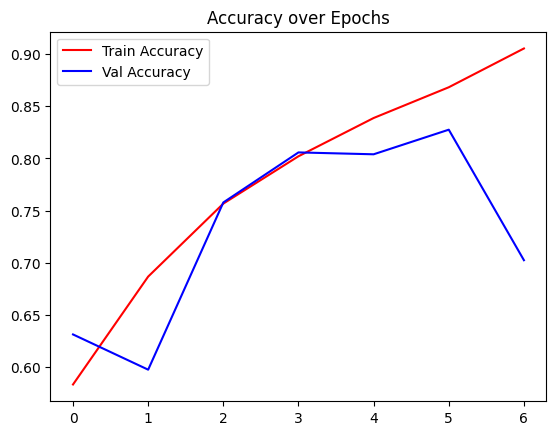

In [ ]:
# PLOT ACCURACY
# ========================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='blue')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()


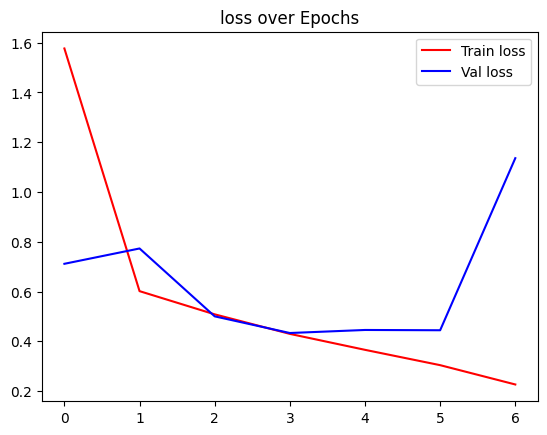

In [ ]:
# PLOT LOSS
# ========================

plt.plot(history.history['loss'], label='Train loss', color='red')
plt.plot(history.history['val_loss'], label='Val loss', color='blue')
plt.legend()
plt.title("loss over Epochs")
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/cat.jpeg')

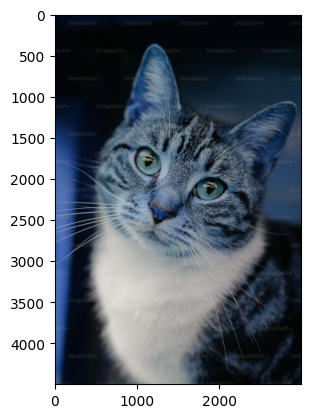

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(4499, 3000, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3)) #bcs we pass in batches and we have only one img to pass so the first arg is 1

In [ ]:
y_pred=model.predict(test_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.]], dtype=float32)

In [39]:
if y_pred[0][0]==1:
  print("Dog")
else:
  print("Cat")

Cat


In [42]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Get true labels and images from validation set
y_true = []
y_pred = []

for images, labels in validation_ds:
    preds = model.predict(images)
    preds = (preds >= 0.5).astype(int).flatten()

    y_pred.extend(preds)
    y_true.extend(labels.numpy().flatten())

# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy (sklearn):", acc*100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━

In [45]:
# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (sklearn):{acc*100}%")

Validation Accuracy (sklearn):80.58%


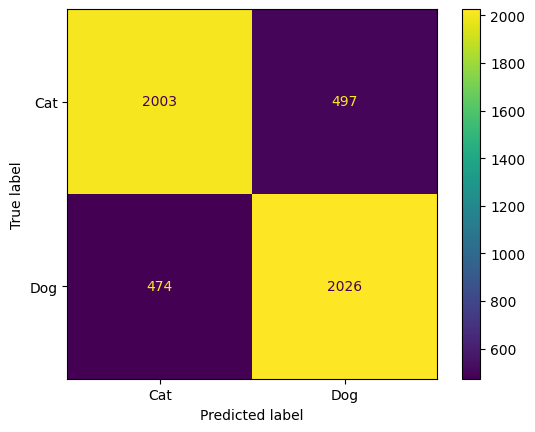

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot()
